In [1]:
using Revise
using Plots

# レナードジョーンズポテンシャル
$$
U(r) = 4\epsilon\left[\left(\frac{\sigma}{r}\right)^p-\left(\frac{\sigma}{r}\right)^q\right]
$$
加わる力は
$$
F(r) = -\frac{d}{dr}U(r) = 4\epsilon\left(p\frac{\sigma^{p}}{r^{p+1}}-q\frac{\sigma^{q}}{r^{q+1}}\right)
$$

In [2]:
potential(r,ϵ,σ,p=12,q=6)=4ϵ*((σ/r)^p - (σ/r)^q)
force(r,ϵ,σ,p=12,q=6)=4ϵ/r*(p*(σ/r)^p - q*(σ/r)^q)

force (generic function with 3 methods)

## 原子モデル

In [3]:
mutable struct Atom
    x::Float64
    v::Float64
    m::Float64
end

### 希ガス分子に対するLennard-Jones パラメータ

|  | $\sigma$[nm] | $\epsilon$[J] | $\epsilon/k_{B}$[K] | m [kg] |
|:---:|:---:|:---:|:---:| :---:|
| Ne | 0.274 | $0.50 \times 10^{-21}$ | 36.2 |  
| Ar | 0.340 | $1.67 \times 10^{-21}$ | 121 |$6.634 \times 10^{-26}$|   
| Kr | 0.365 | $2.25 \times 10^{-21}$ | 163 |
| Xe | 0.398 | $3.20 \times 10^{-21}$ | 232 |  

### Argonの場合

In [ ]:
ϵ = 1.67
σ = 0.34
m = 6.63e-3

a1 = Atom(0.35,0.0,m)
a2 = Atom(-0.35,0.0,m)
f_ar(r) = force(r,ϵ,σ)

0.00663

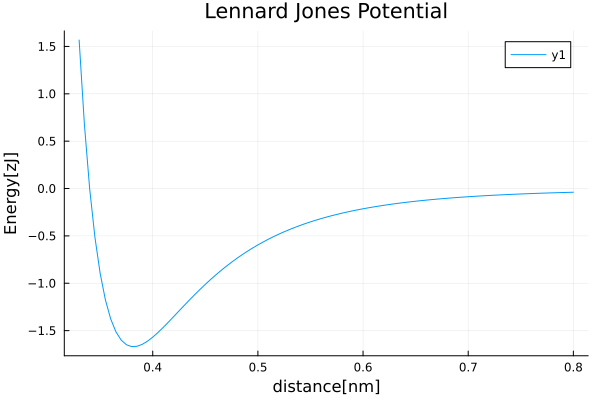

In [5]:
rs = .33:0.005:0.8
plot(rs,potential.(rs,ϵ,σ),title="Lennard Jones Potential",xlabel="distance[nm]",ylabel="Energy[zJ]")

# 速度Verlet
$$
a(t) = \frac{F(r(t))}{m} \\
r(t+\Delta t) = r(t) + v(t)\Delta t + \frac{1}{2}a(t)\Delta t^{2} \\
v(t+\Delta t) = v(t) + \frac{a(t)+a(t+\Delta t)}{2}\Delta t
$$

In [6]:
function verlet(r,v,Δt,n,acc)
    rs = []
    vs = []
    a = acc(r)
    for i = 0:n
        push!(rs,r)
        r = r + v*Δt + a/2*Δt^2
        a_next = acc(r)
        v = v + (a + a_next)*Δt
        a = a_next
    end
    return rs,vs
end

verlet (generic function with 1 method)

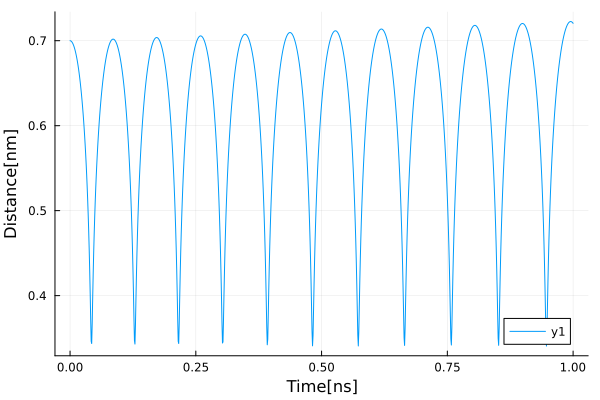

In [7]:
acc(r) = force(r,ϵ,σ)/m

n = 1e6
Δt = 1e-6
samp = 1000
r = 0.7
v = 0

rs,vs = verlet(r,v,Δt,n,acc)
rs = [rs[i] for i= 1:length(rs) if i%samp == 1]
plot( [0:Δt*samp:n*Δt;], rs,xlabel="Time[ns]",ylabel="Distance[nm]")

┌ Info: Saved animation to /Users/hitoshi/Julia/Lennard-Jones/single_LJ.gif
└ @ Plots /Users/hitoshi/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/Users/hitoshi/Julia/Lennard-Jones/single_LJ.gif")
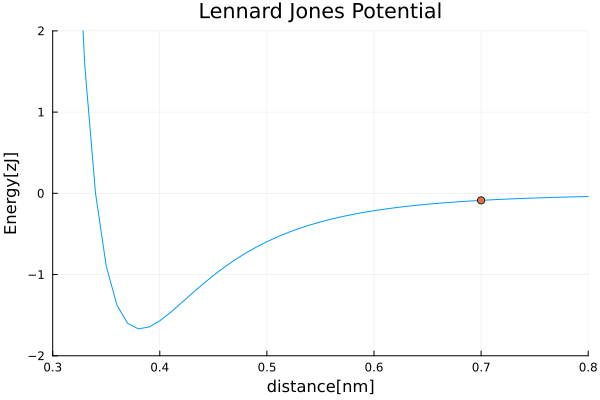

In [8]:
xs = .3:0.01:0.8
anim = Animation()
for r in rs
    plt = plot(xs,potential.(xs,ϵ,σ),title="Lennard Jones Potential",xlabel="distance[nm]",ylabel="Energy[zJ]",label="")
    plt = plot!([r],[potential(r,ϵ,σ)],st=:scatter,xlims=(0.3,0.8),ylims=(-2.0,2.0),label="")
    frame(anim,plt)
end
gif(anim,"single_LJ.gif",fps=30)